1. Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a random kernel of size (3,3) using torch.nn.functional.conv2d

In [1]:
import torch 
from torch import nn 
import torchvision 
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
image = torch.randn(6,6)
print(image)
image = image.unsqueeze(dim=0)
image = image.unsqueeze(dim=0)
print(image.shape)
kernel = torch.ones(3,3)
print(kernel.shape)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)
print(kernel.shape)
output_img = F.conv2d(image,kernel,stride=1,padding=0)
print(output_img)
print(output_img.shape)

tensor([[ 0.2776,  0.7541, -2.2476, -0.0067, -0.1142,  1.8300],
        [ 0.4638,  2.3214,  2.4734, -0.9630, -0.9604,  2.5185],
        [-0.9187,  0.1542,  0.2129,  0.2603,  0.1380,  1.0829],
        [-0.7909,  0.8451,  0.2435,  1.6850, -1.0589,  1.5122],
        [ 0.1209, -0.9610,  2.0265,  0.9458, -0.0841, -1.1026],
        [-0.0943, -0.2178, -0.4447, -1.8422,  0.5888,  0.1381]])
torch.Size([1, 1, 6, 6])
torch.Size([3, 3])
torch.Size([1, 1, 3, 3])
tensor([[[[ 3.4910,  2.9590, -1.2073,  3.7856],
          [ 5.0047,  7.2328,  2.0308,  4.2147],
          [ 0.9325,  5.4124,  4.3691,  3.3787],
          [ 0.7273,  2.2802,  2.0597,  0.7820]]]])
torch.Size([1, 1, 4, 4])


2. Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D to get the same output. You may ignore bias.

In [3]:
image = torch.randn(6,6).unsqueeze(dim=0).unsqueeze(dim=0)
kernel = torch.ones(3,3).unsqueeze(dim=0).unsqueeze(dim=0)
print(f"image: {image.shape}")
print(f"kernel: {kernel.shape}")
conv_layer = nn.Conv2d(in_channels = 1,out_channels=1,kernel_size=3,stride=1,padding=0)
output_img = conv_layer(image)
print(output_img.shape)


image: torch.Size([1, 1, 6, 6])
kernel: torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 4, 4])


3. Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model.

In [4]:
train_data = datasets.MNIST(root='data',download=True,train=True,transform=transforms.ToTensor(),target_transform=None)
test_data = datasets.MNIST(root='data',download=True,train=False,transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=32)
print(f"Number of samples in train dataset: {len(train_data)}")
print(f"Number of samples in test dataset: {len(test_data)}")
print(f"Number of batches in train loader: {len(train_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")

Number of samples in train dataset: 60000
Number of samples in test dataset: 10000
Number of batches in train loader: 1875
Number of batches in test loader: 313


In [5]:
image,label = train_data[0]
print(f"image.shape : {image.shape}")
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)
class_names = train_data.classes
class_names

image.shape : torch.Size([1, 28, 28])


['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

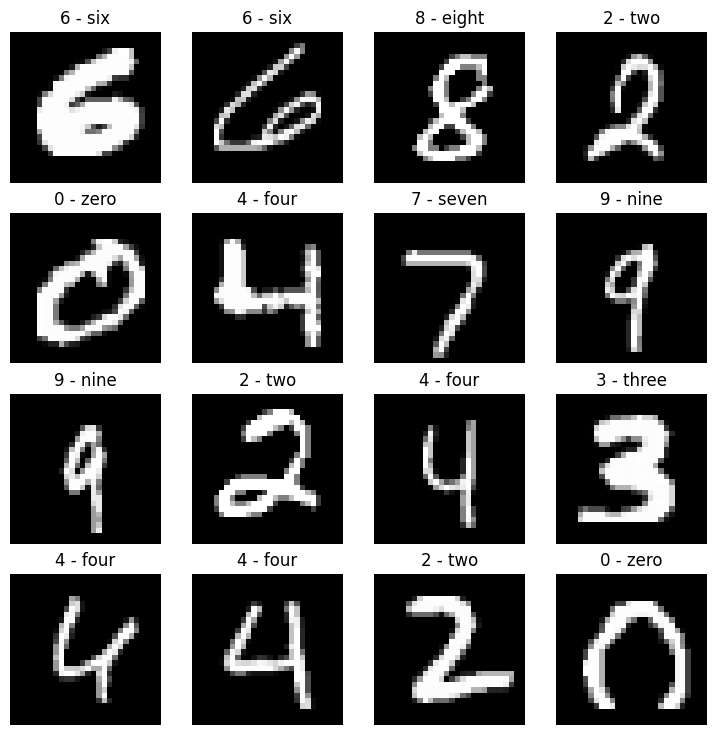

In [6]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1, rows*cols + 1):
    rand_idx = torch.randint(0,len(train_data),size=[1]).item()
    img,label = train_data[rand_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [7]:
train_features_batch,train_labels_batch = next(iter(train_loader))
print(f"train_features_batch.shape:{train_features_batch.shape}")
print(f"train_labels_batch.shape:{train_labels_batch.shape}")

train_features_batch.shape:torch.Size([32, 1, 28, 28])
train_labels_batch.shape:torch.Size([32])


(-0.5, 27.5, 27.5, -0.5)

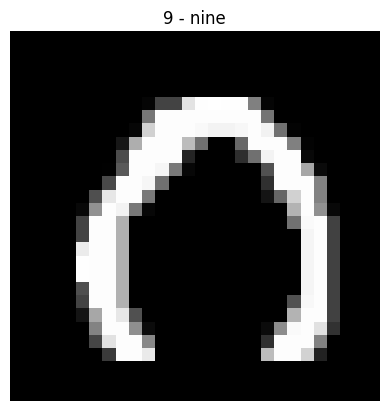

In [8]:
torch.manual_seed(42)
rand_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
image,label = train_features_batch[rand_idx],train_labels_batch[rand_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
class MNISTModel(nn.Module):
    def __init__(self, input_size: int, hidden_units: int, output_size: int):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=input_size, out_channels=hidden_units, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units*2, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(in_channels=hidden_units*2, out_channels=hidden_units, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )

        self.clf_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*1*1, out_features=hidden_units*2*10),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units*2*10, out_features=output_size)
        )
    
    def forward(self, x):
        x = self.net(x)
        #print(f"Output shape of net: {x.shape}")
        x = self.clf_head(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x


In [11]:
print(image.shape)

torch.Size([1, 28, 28])


In [12]:
rand_img_tensor = torch.rand((1,28,28))
rand_img_tensor.shape
rand_img_tensor = rand_img_tensor.unsqueeze(0)
rand_img_tensor.shape


torch.Size([1, 1, 28, 28])

In [13]:
model = MNISTModel(input_size=1,hidden_units=10,output_size=len(class_names)).to(device)
model

MNISTModel(
  (net): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clf_head): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=200, bias=True)
    (2): ReLU()
    (3): Linear(in_features=200, out_features=10, bias=True)
  )
)

In [14]:

model(rand_img_tensor.to(device))

tensor([[-0.0491,  0.0871,  0.0086,  0.0830,  0.0596, -0.1550, -0.0608,  0.2091,
          0.0557, -0.0191]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [16]:
def accuracy_fn(y,y_pred):
    correct = torch.eq(y,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [17]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss,train_acc = 0,0 
    model.to(device)
    for batch,(X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.4f} Train acccuracy:{train_acc:.4f}")

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    test_loss,test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device),y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.4f} Test accuracy:{test_acc:.4f}")  

In [18]:
torch.manual_seed(42)
epochs = 3
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    train_step(model,train_loader,loss_fn,optimizer,accuracy_fn,device)
    test_step(model,test_loader,loss_fn,accuracy_fn,device)

Epoch 1
Train loss: 0.4822 Train acccuracy:84.0950
Test loss: 0.2120 Test accuracy:93.0511
Epoch 2
Train loss: 0.2000 Train acccuracy:93.7717
Test loss: 0.1580 Test accuracy:94.8283
Epoch 3
Train loss: 0.1572 Train acccuracy:95.1233
Test loss: 0.1407 Test accuracy:95.7368


In [23]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)  # Apply softmax to convert logits to probabilities
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [24]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")


Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [25]:
pred_probs = make_predictions(model=model, data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])


In [28]:
y_preds = []
model.eval()
with torch.inference_mode():
    for X,y in test_loader:
        X,y = X.to(device),y.to(device)
        y_logit = model(X)
        y_pred = torch.softmax(y_logit,dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

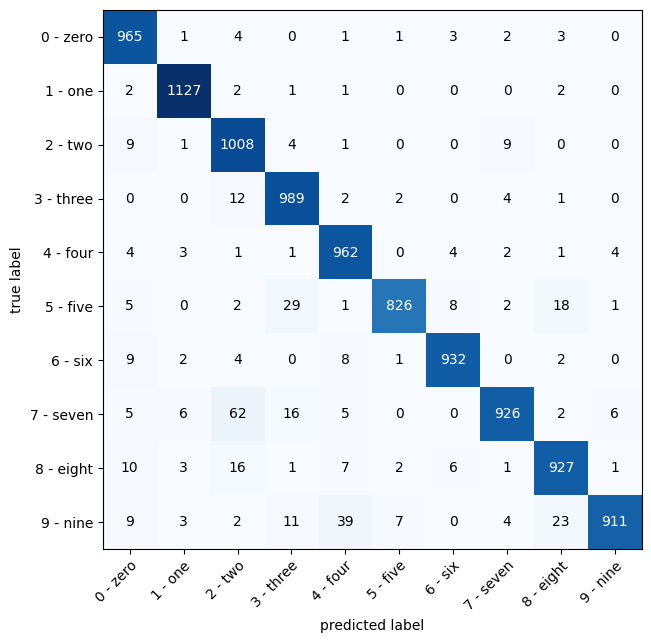

In [29]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat  = ConfusionMatrix(num_classes=len(class_names),
                           task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

In [30]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total number of learnable parameters in the model: {total_params}")

Total number of learnable parameters in the model: 7940


4. Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of percentage drop in parameters vs accuracy.

In [45]:
class ReducedMNISTModel(nn.Module):
    def __init__(self, input_size: int, hidden_units: int, output_size: int):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=input_size, out_channels=hidden_units, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units*2, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )

        self.clf_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*5*5*2, out_features=output_size)  # Adjusted the input size
        )
    
    def forward(self, x):
        x = self.net(x)
        #print(f"output shape of net layer: {x.shape}")
        x = self.clf_head(x)
        #print(f"output shape of clf_head layer: {x.shape}")
        return x

In [49]:
torch.manual_seed(42)
model_1 = ReducedMNISTModel(input_size=1,hidden_units=10,output_size=len(class_names)).to(device)
model_1

ReducedMNISTModel(
  (net): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clf_head): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=500, out_features=10, bias=True)
  )
)

In [50]:
optimizer = torch.optim.Adam(model_1.parameters(),lr=0.01)

In [42]:
print(image.shape) 
random_img_tensor = torch.rand(size=(1,28,28))
random_img_tensor = random_img_tensor.unsqueeze(dim=0)
print(random_img_tensor.shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [51]:
model_1(random_img_tensor.to(device)) 

tensor([[-0.1099,  0.0914,  0.0152, -0.1189,  0.0297,  0.0581,  0.1051,  0.2696,
         -0.1731,  0.1154]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [53]:
torch.manual_seed(42)
epochs = 3
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    train_step(model_1,train_loader,loss_fn,optimizer,accuracy_fn,device)
    test_step(model_1,test_loader,loss_fn,accuracy_fn,device)

Epoch 1
Train loss: 0.1482 Train acccuracy:95.4750
Test loss: 0.0788 Test accuracy:97.4840
Epoch 2
Train loss: 0.0787 Train acccuracy:97.5633
Test loss: 0.0642 Test accuracy:98.0731
Epoch 3
Train loss: 0.0705 Train acccuracy:97.8183
Test loss: 0.0763 Test accuracy:97.8435


In [54]:
pred_probs = make_predictions(model=model_1, data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])


In [55]:
y_preds = []
model_1.eval()
with torch.inference_mode():
    for X,y in test_loader:
        X,y = X.to(device),y.to(device)
        y_logit = model_1(X)
        y_pred = torch.softmax(y_logit,dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

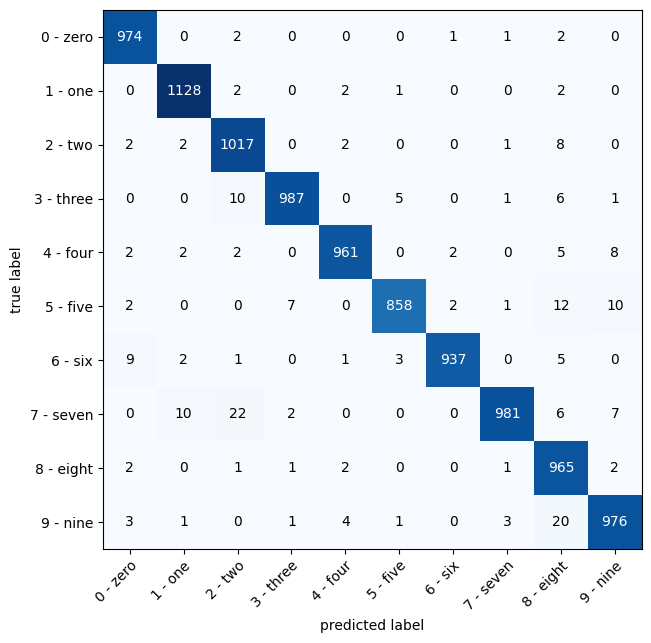

In [56]:
confmat  = ConfusionMatrix(num_classes=len(class_names),
                           task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

In [57]:
def count_parameters(model):
    return sum(p.numel() for p in model_1.parameters() if p.requires_grad)

total_params = count_parameters(model_1)
print(f"Total number of learnable parameters in the model: {total_params}")

Total number of learnable parameters in the model: 6930
